In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mashlyn/online-retail-ii-uci")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'online-retail-ii-uci' dataset.
Path to dataset files: /kaggle/input/online-retail-ii-uci


# Этап 1. Анализ и очистка данных (Pandas)

## 1. Предварительный анализ

*   Новый пункт
*   Новый пункт



*   Загрузите датасет и посмотрите первые 10 строк.
*   Определите размер таблицы и типы данных.
*   Проверьте количество уникальных значений в основных колонках.
*   Найдите количество пропусков и процент пропущенных значений в каждом столбце.
*   Удалите строки, где отсутствует CustomerID или Description.
*   Удалите дубликаты.

In [3]:
#1 Загрузите датасет и посмотрите первые 10 строк.
import pandas as pd

In [4]:
df = pd.read_csv("/kaggle/input/online-retail-ii-uci/online_retail_II.csv")

In [5]:
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [6]:
#2 Определите размер таблицы и типы данных.
#размер таблицы
df.shape

(1067371, 8)

In [7]:
#типы данных
df.dtypes

,0
Invoice,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
Price,float64
Customer ID,float64
Country,object


In [8]:
#3 Проверьте количество уникальных значений в основных колонках.
#unique()	- список уникальных значений
#nunique() - количество уникальных значений
df.nunique()

,0
Invoice,53628
StockCode,5305
Description,5698
Quantity,1057
InvoiceDate,47635
Price,2807
Customer ID,5942
Country,43


In [9]:
#4 Найдите количество пропусков и процент пропущенных значений в каждом столбце.
#количество пропусков
df.isna().sum()

,0
Invoice,0
StockCode,0
Description,4382
Quantity,0
InvoiceDate,0
Price,0
Customer ID,243007
Country,0


In [10]:
#процент пропущенных значений в каждом столбце
df.isna().mean() * 100

,0
Invoice,0.000000
StockCode,0.000000
Description,0.410541
Quantity,0.000000
InvoiceDate,0.000000
Price,0.000000
Customer ID,22.766873
Country,0.000000


In [11]:
#округление до 2 знаков после ,
(df.isna().mean() * 100).round(2)

,0
Invoice,0.00
StockCode,0.00
Description,0.41
Quantity,0.00
InvoiceDate,0.00
Price,0.00
Customer ID,22.77
Country,0.00


In [12]:
#5 Удалите строки, где отсутствует Customer ID или Description.
df = df.dropna(subset=['Customer ID', 'Description'])

In [13]:
#проверка на количество пропусков:
df.isna().sum()

,0
Invoice,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
Price,0
Customer ID,0
Country,0


In [14]:
#6 Удалите дубликаты.
df = df.drop_duplicates()

## 2. Обогащение данных

*   Создайте новый столбец TotalPrice = Quantity * Price.
*   Создайте столбец InvoiceMonth = месяц из InvoiceDate.
*   Создайте столбец IsReturn = 1, если Quantity < 0 (возврат товара), иначе 0.
*   Найдите клиентов с наибольшей долей возвратов.

In [15]:
#1 Создайте новый столбец TotalPrice = Quantity * Price.
df['TotalPrice'] = df['Quantity'] * df['Price']

In [16]:
#2 Создайте столбец InvoiceMonth = месяц из InvoiceDate.
#текст переводит в формат даты
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [17]:
#извлекает номер месяца из даты
df['InvoiceMonth'] = df['InvoiceDate'].dt.month

In [18]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,InvoiceMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,12
...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,12
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,12
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,12
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,12


In [19]:
#3 Создайте столбец IsReturn = 1, если Quantity < 0 (возврат товара), иначе 0.
#.astype(int) → превращает: True в 1, False в 0
df['IsReturn'] = (df['Quantity'] < 0).astype(int)

In [20]:
df['IsReturn'].unique()

array([0, 1])

In [21]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,InvoiceMonth,IsReturn
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,12,0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,12,0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,12,0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,12,0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,12,0
...,...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,12,0
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,12,0
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,12,0
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,12,0


In [22]:
#4 Найдите клиентов с наибольшей долей возвратов.
#группируем все заказы и возвраты по клиентам
customer_returns = (df.groupby(['Customer ID']).agg(total_orders=('Invoice','count'), total_returns=('IsReturn','sum')))

In [23]:
#считаем долю возвратов
customer_returns['ratio'] = customer_returns['total_returns'] / customer_returns['total_orders']

In [24]:
#сортируем по доле возвратов
top_return = customer_returns.sort_values('ratio', ascending=False)

In [25]:
#выводим топ-50 клиентов с наибольшей долей возвратов
print(top_return.head(50))

             total_orders  total_returns  ratio
Customer ID                                    
13528.0                 1              1    1.0
14120.0                 1              1    1.0
15357.0                 1              1    1.0
16879.0                 2              2    1.0
13231.0                 1              1    1.0
15383.0                 1              1    1.0
16995.0                 1              1    1.0
17013.0                 2              2    1.0
16994.0                 1              1    1.0
16853.0                 2              2    1.0
16981.0                 1              1    1.0
14313.0                 1              1    1.0
16703.0                 1              1    1.0
17130.0                 1              1    1.0
18023.0                 1              1    1.0
13633.0                 1              1    1.0
12896.0                 1              1    1.0
14337.0                36             36    1.0
15997.0                 1              1

## 3. Исследование продаж
*   Найдите:
*      топ-10 популярных товаров.
*      топ-5 стран по количеству покупок и по выручке.
*      средний чек по странам.
*      среднее количество товаров на заказ.
*   Найдите дни недели с максимальной и минимальной выручкой.
*   Найдите среднюю выручку по каждому месяцу.

In [26]:
#1.1 топ-10 популярных товаров
top10_products = df['StockCode'].value_counts().head(10)

In [27]:
print(top10_products)

StockCode
85123A    5156
22423     3678
85099B    3380
84879     2709
20725     2686
21212     2582
21232     2122
47566     2121
20727     2089
22383     2070
Name: count, dtype: int64


In [28]:
#1.2 топ-5 стран по количеству покупок и по выручке.
#топ-5 стран по количеству покупок
top5_purchases = df.groupby(['Country']).agg({'Invoice':'count'}).sort_values('Invoice', ascending=False).head(5)

In [29]:
print(top5_purchases)

                Invoice
Country                
United Kingdom   716115
Germany           17339
EIRE              16014
France            13897
Netherlands        5137


In [30]:
#топ-5 стран по по выручке
top5_revenue = df.groupby(['Country']).agg({'TotalPrice':'sum'}).sort_values('TotalPrice', ascending=False).head(5)

In [31]:
print(top5_revenue)

                  TotalPrice
Country                     
United Kingdom  1.348251e+07
EIRE            5.735098e+05
Netherlands     5.483307e+05
Germany         4.119592e+05
France          3.200463e+05


In [32]:
#1.3 средний чек по странам.
#группируем все заказы и выручку по странам
avg_check = (df.groupby(['Country']).agg(total_orders=('Invoice','count'), total_revenue=('TotalPrice','sum')))

In [33]:
#считаем средний чек
avg_check['avg_check'] = avg_check['total_revenue'] / avg_check['total_orders']

In [34]:
#сортируем по среднему чеку
avg_check = avg_check.sort_values('avg_check', ascending=False)

In [35]:
print(avg_check['avg_check'])

Country
Netherlands             106.741425
Australia                88.065831
Denmark                  80.877779
Japan                    70.198407
Sweden                   65.094207
Thailand                 40.401842
Singapore                38.029364
Lebanon                  37.641778
EIRE                     35.813024
Switzerland              32.301965
Lithuania                31.770649
Israel                   31.737695
Greece                   28.650814
Finland                  28.135796
Norway                   27.106965
Channel Islands          24.957582
Austria                  24.709595
Spain                    24.244390
Germany                  23.759107
Czech Republic           23.590667
United Arab Emirates     23.501839
France                   23.029881
Bahrain                  22.955424
Iceland                  22.169054
Canada                   21.416842
European Community       21.176230
Portugal                 20.992100
Cyprus                   20.771443
Belgium     

In [36]:
#1.4 среднее количество товаров на заказ.
#группируем все заказы и выручку по странам
avg_purchase = (df.groupby(['Country']).agg(total_orders=('Invoice','count'), total_quantity=('Quantity','sum')))

In [37]:
#считаем среднее количество товаров на заказ по странам
avg_purchase['avg_purchase'] = avg_purchase['total_quantity'] / avg_purchase['total_orders']

In [38]:
#сортируем по среднему количеству товаров на заказ
avg_purchase = avg_purchase.sort_values('avg_purchase', ascending=False)

In [39]:
print(avg_purchase['avg_purchase'])

Country
Denmark                 294.559598
Netherlands              74.333852
Sweden                   65.316456
Australia                54.695767
Japan                    53.341593
Thailand                 33.578947
Singapore                20.193642
Czech Republic           19.733333
EIRE                     19.340390
Norway                   17.987768
Switzerland              16.913342
Canada                   16.039474
Israel                   15.947040
Lithuania                14.974026
United Arab Emirates     14.821244
Finland                  13.648236
Iceland                  13.364865
France                   12.949486
Bahrain                  12.796610
Germany                  12.792895
Channel Islands          12.385784
Austria                  12.053305
Spain                    11.898508
Greece                   11.624434
United Kingdom           11.442740
Portugal                 11.214582
Belgium                  11.124759
Poland                   10.444023
Italy       

##  4. Визуализация (Matplotlib / Seaborn / Plotly)

*   Постройте гистограмму распределения Price и TotalPrice.
*   Постройте boxplot для выручки (TotalPrice) по странам.
*   Нарисуйте топ-10 товаров по количеству продаж.
*   Визуализируйте выручку по месяцам.
*   Постройте heatmap корреляции между числовыми признаками.
*   Постройте pie chart распределения заказов по странам.
*   Нарисуйте scatterplot зависимости Quantity и TotalPrice.
*     Совет: используйте plt.figure(figsize=(10,5)) и подписывайте оси, чтобы графики выглядели аккуратно.

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

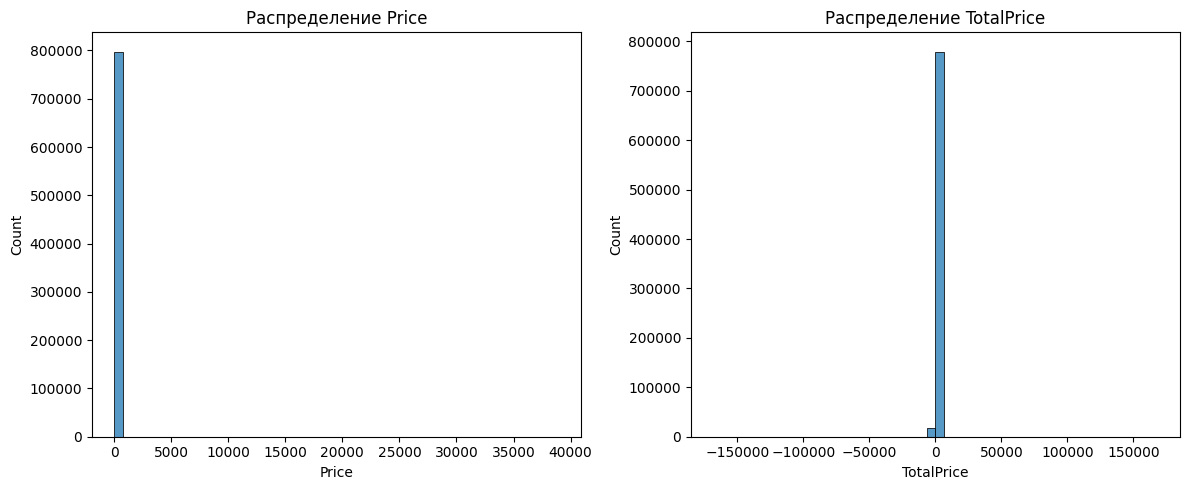

In [41]:
#1 Постройте гистограмму распределения Price и TotalPrice.
plt.figure(figsize=(12,5)) #создаёт пустой график размерами 12×5 дюймов для двух гистограмм рядом

plt.subplot(1, 2, 1) #разбивает график на сетку из нескольких подграфиков (количество строк, количество столбиков, номер подграфика).
sns.histplot(df['Price'], bins=50)
plt.title('Распределение Price')
plt.xlabel('Price')

plt.subplot(1, 2, 2)
sns.histplot(df['TotalPrice'], bins=50)
plt.title('Распределение TotalPrice')
plt.xlabel('TotalPrice')

plt.tight_layout() #функция matplotlib, которая автоматически подбирает расстояния между подграфиками, чтобы они не налезали друг на друга
plt.show()

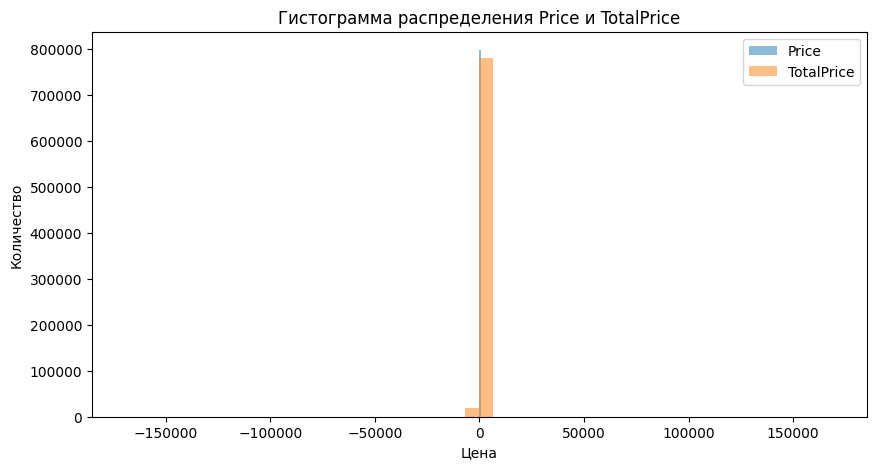

In [42]:
#или
plt.figure(figsize=(10,5)) #создаёт пустой график размерами 10×5 дюймов

plt.hist(df['Price'], bins=50, alpha=0.5, label='Price') #количество столбцов, прозрачность, подпись в легенде
plt.hist(df['TotalPrice'], bins=50, alpha=0.5, label='TotalPrice')

plt.title('Гистограмма распределения Price и TotalPrice')
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.legend()

plt.show()

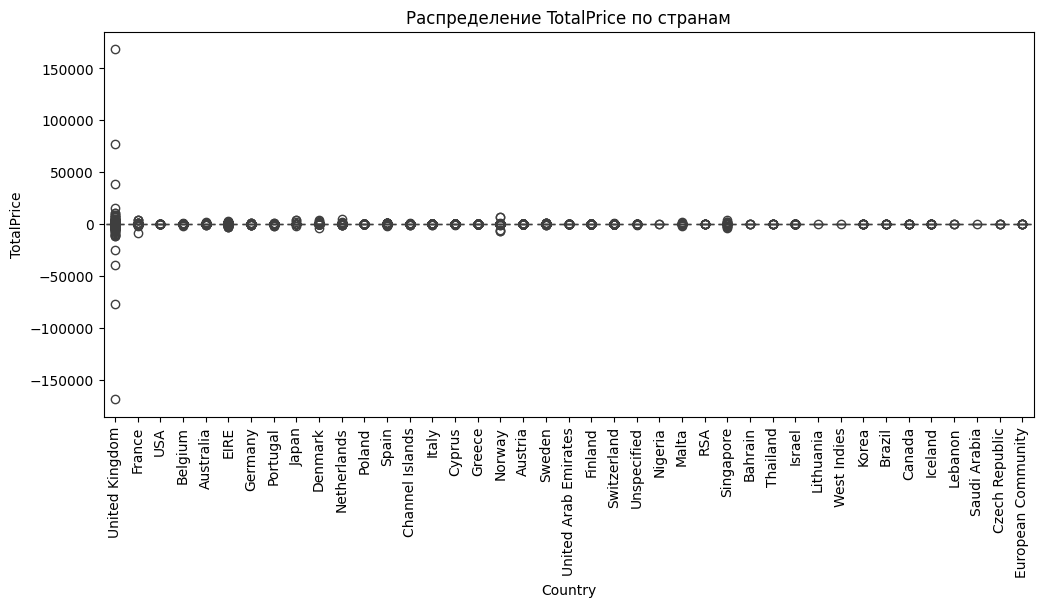

In [43]:
#2 Постройте boxplot для выручки (TotalPrice) по странам.
plt.figure(figsize=(12,5))
sns.boxplot(x=df['Country'], y=df['TotalPrice'])
plt.xticks(rotation=90) #поворот подписей стран, чтобы не налезали
plt.title('Распределение TotalPrice по странам')
plt.show()

In [44]:
#3 Нарисуйте топ-10 товаров (StockCode) по количеству продаж.
top10_products = df['StockCode'].value_counts().head(10)

In [85]:
print(top10_products)

StockCode
85123A    5156
22423     3678
85099B    3380
84879     2709
20725     2686
21212     2582
21232     2122
47566     2121
20727     2089
22383     2070
Name: count, dtype: int64


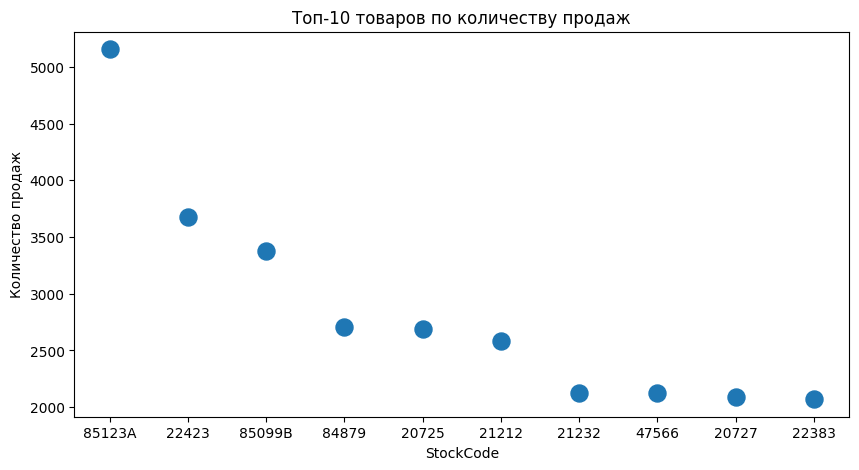

In [45]:
plt.figure(figsize=(10,5))
plt.scatter(top10_products.index, top10_products.values, s=150) #индекс товара из топ-10, количество продаж (упоминаний), s - размер точек
plt.title('Топ-10 товаров по количеству продаж')
plt.xlabel('StockCode')
plt.ylabel('Количество продаж')
plt.show()

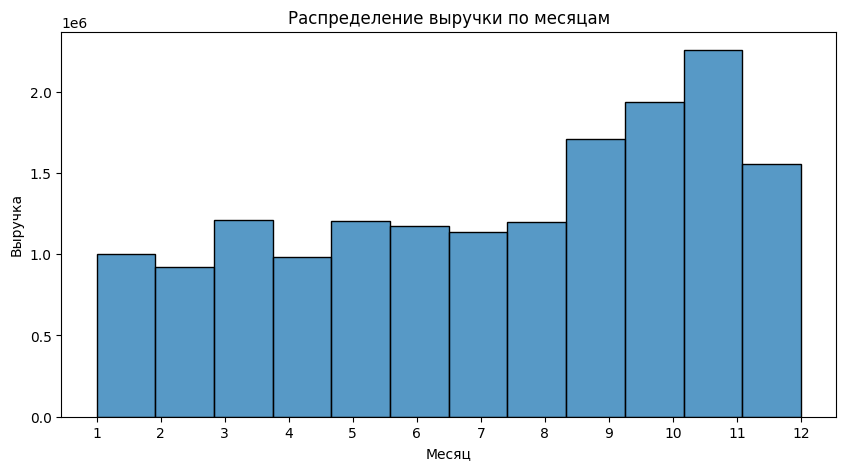

In [46]:
#4 Визуализируйте выручку (TotalPrice) по месяцам (InvoiceMonth).
plt.figure(figsize=(10,5))
sns.histplot(x=df['InvoiceMonth'], weights=df['TotalPrice'], bins=12)   #weights - считает выручку по месяцам, 12 столбиков
plt.title('Распределение выручки по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.xticks(range(1, 13)) #задает значения х от 1 до 12
plt.show()

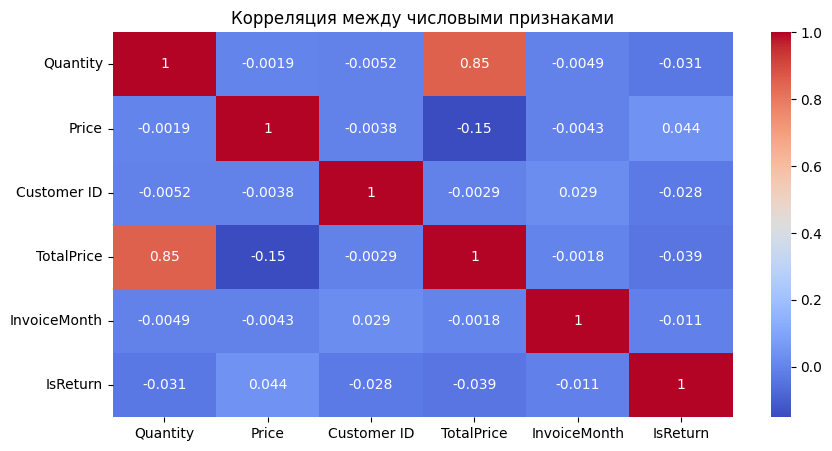

In [47]:
#5 Постройте heatmap корреляции между числовыми признаками.
plt.figure(figsize=(10,5))
numeric_df = df.select_dtypes(include='number') #выбирает только числовые колонки (Quantity, Price, TotalPrice, Customer ID, InvoiceMonth и т.д.)
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm') #annot=True — подписывает числа внутри клеток, cmap='coolwarm' —  цветовая карта: красный - сильная прямая связь, синий - сильная обратная связь
plt.title('Корреляция между числовыми признаками')
plt.show()

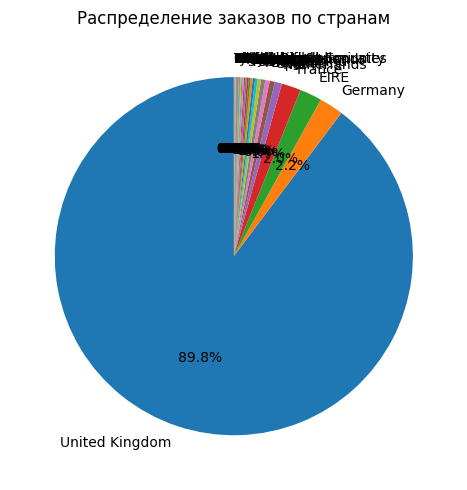

In [48]:
#6 Постройте pie chart распределения заказов по странам.
plt.figure(figsize=(10,5))
country_counts = df['Country'].value_counts() #количество заказов по странам (упоминаний)
plt.pie(country_counts.values,labels=country_counts.index, autopct='%1.1f%%', startangle=90) #количество заказов, индекс страны, отображение процентов внутри сегментов, поворот диаграммы, чтобы она начиналась сверху
plt.title('Распределение заказов по странам')
plt.tight_layout() #чтобы подписи не залезали друг на друга (но здесь не помогло)
plt.show()

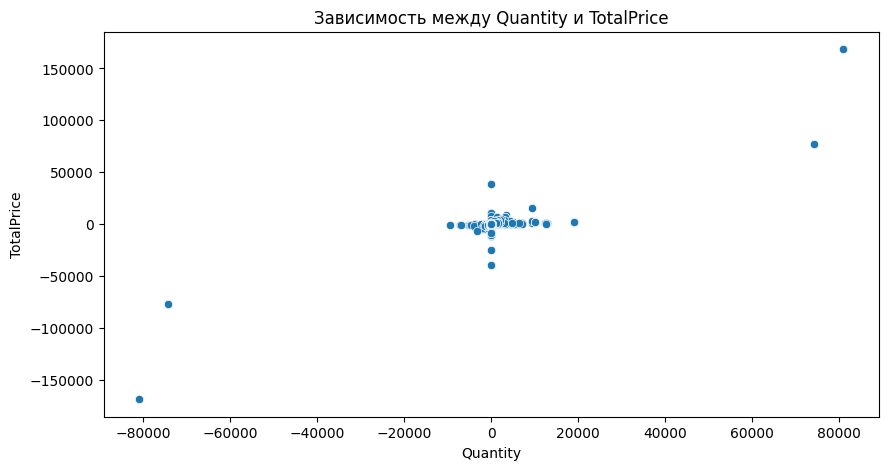

In [49]:
#7 Нарисуйте scatterplot зависимости Quantity и TotalPrice.
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['Quantity'], y=df['TotalPrice'])
plt.title('Зависимость между Quantity и TotalPrice')
plt.show()

In [50]:
corr = df['Quantity'].corr(df['TotalPrice'])
print(f'Коэффициент корреляции между Quantity и TotalPrice: {corr:.2f}')

Коэффициент корреляции между Quantity и TotalPrice: 0.85
